In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

%matplotlib inline

In [5]:
ls

Dam_Notebook.ipynb  Train-IsAlert-secondRound.csv


In [2]:
data = pd.read_csv("Train-IsAlert-secondRound.csv")

In [7]:
data.head()

,TrialID,ObsNum,physiologicl_att1,physiological_att2,physiological_att3,physiological_att4,physiological_att5,physiological_att6,physiological_att7,environmental_att1,...,environmental_att11,vehicular_att1,vehicular_att2,vehicular_att3,vehicular_att4,vehicular_att5,vehicular_att6,vehicular_att7,vehicular_att9,IsAlert
0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,0.0,...,1,101.96,0.175,752,5.99375,2005,13.4,4,0,0
1,0,1,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,0.0,...,1,101.98,0.455,752,5.99375,2007,13.4,4,0,0
2,0,2,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,0.0,...,1,101.97,0.280,752,5.99375,2011,13.4,4,0,0
3,0,3,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,0.0,...,1,101.99,0.070,752,5.99375,2015,13.4,4,0,0
4,0,4,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,0.0,...,1,102.07,0.175,752,5.99375,2017,13.4,4,0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592243 entries, 0 to 592242
Data columns (total 28 columns):
TrialID                592243 non-null int64
ObsNum                 592243 non-null int64
physiologicl_att1      592243 non-null float64
physiological_att2     592243 non-null float64
physiological_att3     592243 non-null int64
physiological_att4     592243 non-null float64
physiological_att5     592243 non-null float64
physiological_att6     592243 non-null int64
physiological_att7     592243 non-null float64
environmental_att1     592243 non-null float64
environmental_att2     592243 non-null float64
environmental_att3     592243 non-null int64
environmental_att4     592243 non-null float64
environmental_att5     592243 non-null int64
environmental_att6     592243 non-null int64
environmental_att8     592243 non-null int64
environmental_att9     592243 non-null int64
environmental_att10    592243 non-null float64
environmental_att11    592243 non-null int64
vehicular_att1  

In [42]:
X = data.drop(['TrialID','IsAlert','ObsNum'], axis=1)
Y = data.IsAlert

In [12]:
train_test_split?

In [4]:
from sklearn.cross_validation import train_test_split

train_X, test_X,train_Y,test_Y = train_test_split(X,Y,test_size=0.3, random_state=42)

In [15]:
print train_X.shape
print test_X.shape

(414570, 26)
(177673, 26)


## Modelling

## Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100,random_state=42,n_jobs=-1)

scores = cross_val_score(clf,X,Y, cv=5,scoring='roc_auc',n_jobs=-1)
print ("Score %0.4f =/- %0.4f") % (scores.mean(),scores.std())

Score %0.4f =/- %0.4f


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

In [19]:
from sklearn.grid_search import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint as sp_randint


clf = RandomForestClassifier(n_estimators= 100,random_state=42,n_jobs=-1)


param_dist = {"max_depth": [5, None],
              "max_features": ['auto'],
              #"max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(1, 11),
              "min_samples_leaf": sp_randint(1, 11),
              #"bootstrap": [True, False],
              "criterion": ["gini"]}

# run randomized search
n_iter_search = 10
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,n_iter=n_iter_search,cv=5,scoring='roc_auc',n_jobs=-1)

random_search.fit(X,Y)

RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'max_features': ['auto', None], 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb5356df710>, 'criterion': ['gini', 'entropy'], 'max_depth': [5, None], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fb5356df9d0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          scoring='roc_auc', verbose=0)

In [26]:
random_search.best_score_

0.76673255059108558

In [31]:
random_search.grid_scores_

[mean: 0.61560, std: 0.08298, params: {'max_features': None, 'min_samples_split': 8, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 7},
 mean: 0.70314, std: 0.06897, params: {'max_features': None, 'min_samples_split': 10, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 6},
 mean: 0.76397, std: 0.06795, params: {'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4},
 mean: 0.63596, std: 0.08093, params: {'max_features': 'auto', 'min_samples_split': 10, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1},
 mean: 0.76673, std: 0.06740, params: {'max_features': 'auto', 'min_samples_split': 5, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3},
 mean: 0.60387, std: 0.06679, params: {'max_features': None, 'min_samples_split': 1, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 5},
 mean: 0.60115, std: 0.06964, params: {'max_features': None, 'min_samples_split': 5, 'criterion': 'en

In [25]:
random_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 5}

In [27]:
random_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [ ]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

param_dist = {"max_depth": [4,5,6],
              #"max_features": ['auto',None],
              #"max_features": sp_randint(1, 11),
              "min_samples_split": [4,5,6],
              "min_samples_leaf": [2,3,4],
              #"bootstrap": [True, False],
              #"criterion": ["gini", "entropy"]}

# run randomized search
grid_search = GridSearchCV(clf, param_grid=param_dist,cv=5,scoring='roc_auc',n_jobs=-1)

grid_search.fit(X,Y)

In [ ]:
print (grid_search.best_score_)
print (grid_search.best_params_)

## Auto Sklearn

In [36]:
import autosklearn.classification
automl = autosklearn.classification.AutoSklearnClassifier(
        tmp_folder='/tmp/autoslearn_example_tmp3',
        output_folder='/tmp/autosklearn_example_out3',
        delete_tmp_folder_after_terminate=False,
        resampling_strategy='cv', resampling_strategy_arguments={'folds': 5})


automl.fit(X,Y,dataset_name = 'IsAlert3',metric = "auc_metric")
#automl.refit(X,Y)

print(automl.show_models())

#predictions = automl.predict(X_test)
#print("Accuracy score", sklearn.metrics.accuracy_score(y_test, predictions))

[WARNING] [2016-06-03 01:26:29,008:AutoML(1):IsAlert2] Could not delete output dir: /tmp/autosklearn_example_out2


IndexError: indices are out-of-bounds

## TPOT

In [ ]:
from tpot import TPOT

tpot = TPOT(generations=5, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_mnist_pipeline.py')

## Xgboost

In [40]:
def modelfit(alg,x,y,useTrainCV=True,cv_folds=5,early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(x, label=y) # add y.values
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics=['auc'],early_stopping_rounds=early_stopping_rounds, show_progress=False)
        #print cvresults.shape[0]
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(x, y,eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(x)
    dtrain_predprob = alg.predict_proba(x)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y, dtrain_predictions)) # add y.values
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, dtrain_predprob))
                    
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).order(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')


Will train until cv error hasn't decreased in 50 rounds.



Model Report
Accuracy : 0.925
AUC Score (Train): 0.973145


/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: order is deprecated, use sort_values(...)


AttributeError: 'module' object has no attribute 'ylabel'

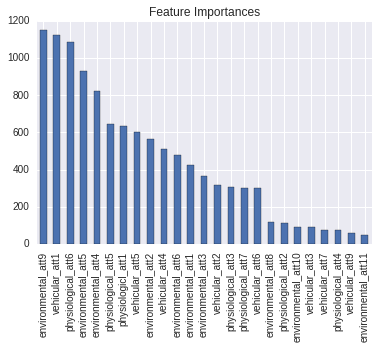

In [46]:
#Initiate model with 
import xgboost as xgb
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

modelfit(alg=xgb1, x=X,y=Y)

In [47]:
import xgboost as xgb
clf = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=400,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=-1,
 scale_pos_weight=1,
 seed=27)

scores = cross_val_score(clf,X,Y, cv=5,scoring='roc_auc',n_jobs=-1)
print ("Score %0.4f =/- %0.4f") % (scores.mean(),scores.std())

Score %0.4f =/- %0.4f


TypeError: unsupported operand type(s) for %: 'NoneType' and 'tuple'

In [49]:
scores.mean()

0.68404623791366936